# Export to other countries

## Data preprosessing Visalization and analysis

import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from deep_translator import GoogleTranslator

Read data from .csv file

In [2]:
df = pd.read_csv('diger-olkelere-ixrac-dt_bh_002.csv')
df.head()

,Year,Unnamed: 1,Digər ölkələr (min ABŞ dollar),Albaniya (min ABŞ dollar),Almaniya (min ABŞ dollar),Angilya (min ABŞ dollar),Anqola (min ABŞ dollar),Argentina (min ABŞ dollar),Avstraliya (min ABŞ dollar),Avstriya (min ABŞ dollar),...,Fransa Polineziyası,Qambiya,Qvineya-Bissau,Normand adaları,Samoa,Solomon adaları,Somali,Vanuatu,Yeni Kaledoniya (Fransa),Sint-Marten (Niderland)
0,2024,NaN,24855641.2,1827.1,776979.8,-,98.2,892.9,203.0,50644.5,...,-,3.4,-,-,-,-,-,-,-,-
1,2023,NaN,32245363.7,950.9,907923.0,-,158.9,-,29251.9,153795.1,...,-,-,-,-,-,-,-,-,-,-
2,2022,NaN,36511371.3,364.6,591301.1,-,202.5,11314.2,139202.0,90762.6,...,-,-,-,-,-,-,-,-,-,-
3,2021,NaN,20417959.7,4293.1,650258.5,-,123.7,11.8,21309.7,139980.4,...,-,0.0,-,-,-,-,17.5,0.0,-,0.0
4,2020,NaN,12426740.7,0.0,234109.3,-,17.3,5508.5,70687.7,127581.4,...,-,-,-,-,-,-,-,-,-,-


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 211 entries, Year to Sint-Marten (Niderland)
dtypes: float64(85), int64(1), object(125)
memory usage: 49.6+ KB


Column Name Simplification: Unnecessary parts in column names (such as “thousand USD”) and extra spaces are removed to make the names cleaner and easier to use.
Removing Unnecessary Columns: Empty columns (e.g. Unnamed columns) are dropped from the dataset.
Type Conversion (Numeric Conversion): All export values are converted to numeric format, and special symbols like “-” are replaced with 0. The Year column is converted to integer (int) format so it is displayed correctly in charts.
Validation: The structure and data types of the DataFrame are verified using df.info() to ensure everything is correct.

In [4]:
def clean_column_names(df):
    df.columns = [column.replace(' (min ABŞ dollar)', '').strip() for column in df.columns]
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    return df
    
df = clean_column_names(df)

col_to_fix = df.columns.drop('Year')
for column in col_to_fix:
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)
    
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 210 entries, Year to Sint-Marten (Niderland)
dtypes: float64(209), int64(1)
memory usage: 49.3 KB


Top 15 Countries: The first 15 countries with the largest share of total exports are selected.
Other Partners: All remaining smaller countries are merged into a single column called Other_Partners to avoid visual clutter in charts.
Automatic Translation: Country names are translated from Azerbaijani to English using GoogleTranslator, standardized to Title Case, and stored in a cache so the translation process is faster and reused efficiently.
Result: A new DataFrame is created that is more compact, English-labeled, and well-grouped, making it easier and cleaner for analysis and visualization.

In [5]:

country_totals = df.drop(columns=['Year', 'Digər ölkələr']).sum().sort_values(ascending=False)

top_15_countries = country_totals.head(15).index.tolist()


all_countries = df.columns.drop(['Year', 'Digər ölkələr'])
other_countries = [c for c in all_countries if c not in top_15_countries]

other_partners = df[other_countries].sum(axis=1)



df_final = pd.concat(
    [df[['Year'] + top_15_countries],
     other_partners.rename('Other_Partners')],
    axis=1
).copy()



def translate_columns(df):
    translator = GoogleTranslator(source='az', target='en')
    cache = {}

    new_cols = []
    for col in df.columns:
        if col == 'Year':
            new_cols.append('Year')
        else:
            if col not in cache:
                cache[col] = translator.translate(col).title().replace('-', '_')
            new_cols.append(cache[col])

    df.columns = new_cols
    return df


df = translate_columns(df_final)
df.head()

,Year,Italy,Turkey,Israel,France,United States Of America,India,Indonesia,Germany,Georgia,Spain,Greece,Croatia,Czech Republic,Portugal,Taiwan (Province Of China),Other_Partners
0,2024,10875130.2,3819407.9,733528.2,96304.1,135030.9,734416.4,179802.6,776979.8,675192.7,163696.2,626591.0,873440.8,1088485.9,631357.5,61.6,3446215.2
1,2023,15208067.6,5359328.1,1401607.3,133219.5,16011.4,1234731.0,150790.4,907923.0,759444.5,785367.8,1363448.3,590440.5,684215.5,299628.3,216.0,3350924.5
2,2022,17782508.1,3544755.9,1682726.0,50992.0,90337.9,1662623.9,606043.5,591301.1,635656.8,1008998.2,1391812.2,952396.7,922190.6,743407.5,207637.4,4637983.5
3,2021,9243521.4,2818116.6,898097.0,64595.2,75147.3,594430.9,87318.6,650258.5,661042.7,564436.2,415415.9,751278.7,263788.9,587440.3,38.5,2743033.0
4,2020,4172267.9,2597747.0,437500.1,110662.5,24935.8,456784.5,458.5,234109.3,461909.4,329270.3,523303.2,470818.9,229679.0,239779.1,48034.6,2089480.6


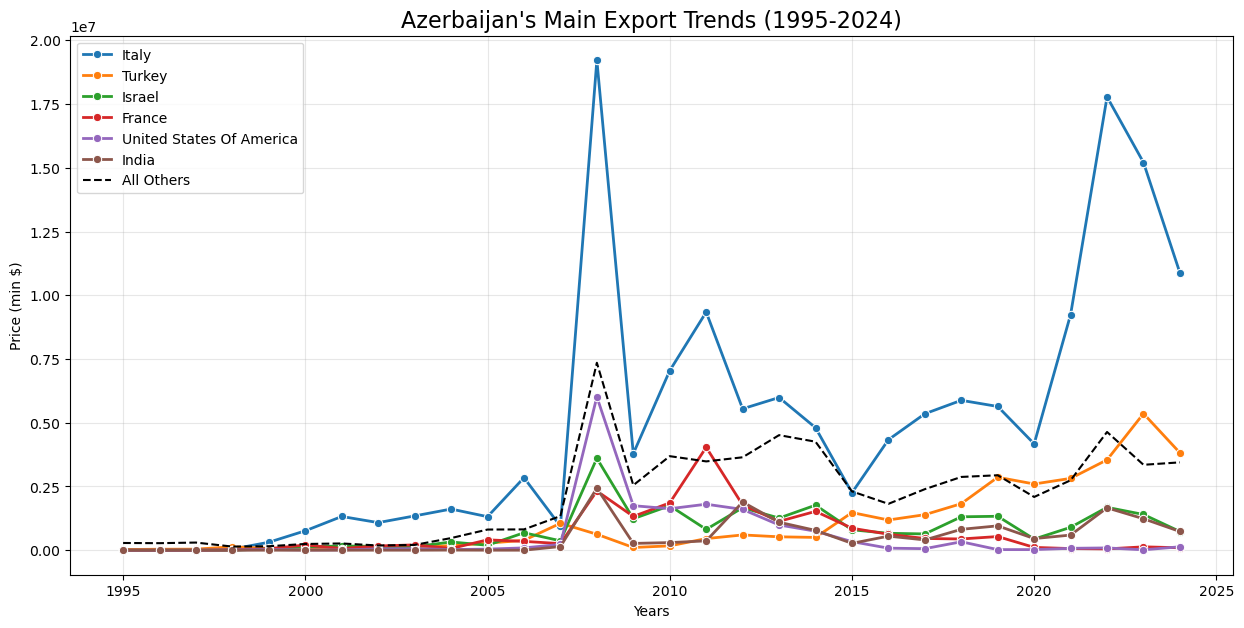

In [6]:
def make_columns_unique(df):
    df= df.loc[:, df.columns.duplicated()]
    return df

columns_to_plot = [col for col in df.columns if col not in ['Other_Partners', 'Year']]

plt.figure(figsize=(15, 7))
for i in range(len(columns_to_plot)):
    if i>5:
        break
    if columns_to_plot[i]=='Year':
        continue
    sns.lineplot(data=df, x='Year', y=f'{columns_to_plot[i]}', label=f'{columns_to_plot[i]}', marker='o', linewidth=2)

sns.lineplot(data=df, x='Year', y='Other_Partners', label='All Others', linestyle='--', color='black')


plt.title('Azerbaijan\'s Main Export Trends (1995-2024)', fontsize=16)
plt.ylabel('Price (min $)')
plt.xlabel('Years')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### Italy has the highest total exports.
### This amount is higher than the combined exports to 165 out of 180 countries.
### Therefore, if economic relations with Italy weaken, Azerbaijan’s budget revenues will decrease.

### Since 2020, exports from Azerbaijan to Italy have increased significantly and the strongest acceleration has been observed.

### This trend coincides with:

### The activation of the Trans-Adriatic Pipeline (TAP), which has enabled direct natural gas exports from Azerbaijan to Italy.

### Europe's post-COVID and post-2022 energy diversification strategy, where Azerbaijan emerges as a reliable alternative supplier.

### After 2015, Azerbaijan’s exports to Turkey increased gradually due to the steady development of energy infrastructure projects such as TANAP and the strengthening of long-term economic cooperation between the two countries.
### This gradual growth reflects a structural and sustainable expansion rather than a short-term trade shock, with energy remaining the main driver of exports."

### Between 2007 and 2008, Azerbaijan’s exports to Italy increased sharply mainly due to a surge in crude oil exports, driven by high global oil prices and expanded production from major projects such as Azeri–Chirag–Gunashli (ACG).
### Italy, being a key importer of Azerbaijani oil, benefited directly from this price and volume effect, which caused export values to rise rapidly in a short period.

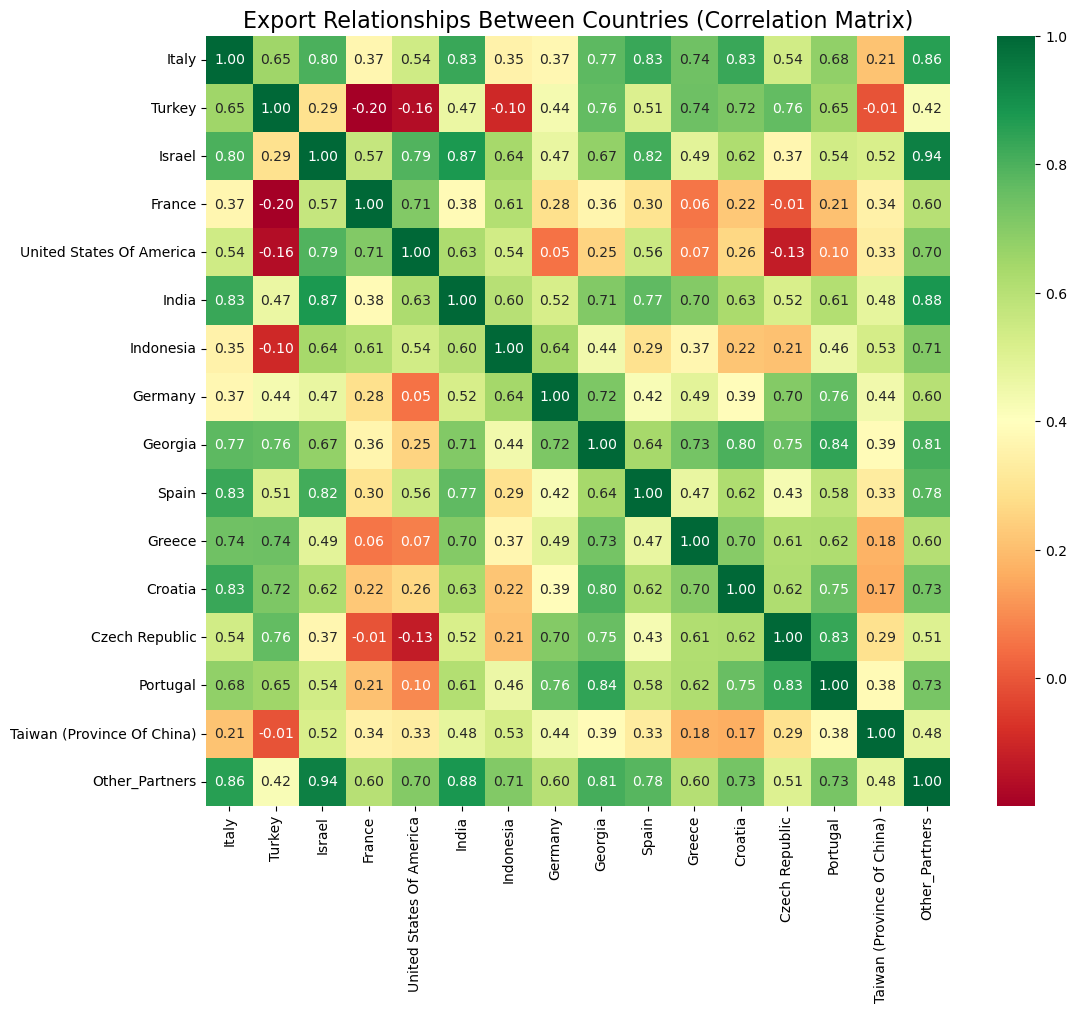

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(columns=['Year']).corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Export Relationships Between Countries (Correlation Matrix)', fontsize=16)
plt.show()

### If we look at the correlation matrix, we can see that the correlation coefficient between Italy and Israel is 0.80.
### This shows a strong positive relationship, meaning that increases and decreases in exports to these two countries move in a similar rhythm. 
    
### The correlation coefficient between France and Turkey is -0.20, which means there is a weak and negative relationship between exports to these two countries.
### In other words, exports to Turkey and exports to France do not move together; when one increases, the other may decrease, but this relationship is not stable or strong.

### In practical terms, this shows that Azerbaijan’s export strategy toward these two countries is largely independent, and changes in one market do not significantly affect the other.

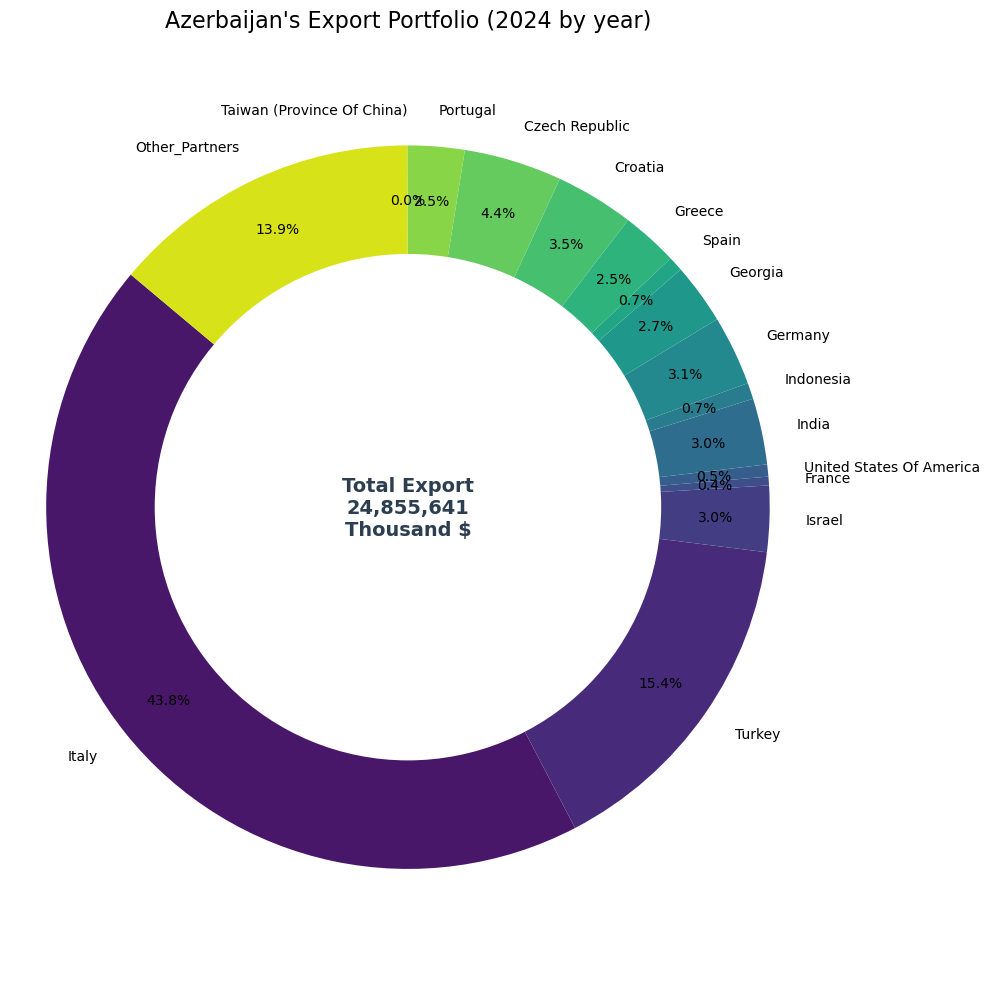

In [19]:
latest_year = df['Year'].max()
pie_data = df[df['Year'] == latest_year].drop(columns='Year').iloc[0]

plt.figure(figsize=(10, 10))
plt.pie(pie_data, 
        labels=pie_data.index, 
        autopct='%1.1f%%',   
        startangle=140,      
        colors=sns.color_palette('viridis', len(pie_data)),
        pctdistance=0.85)    

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

total_export = pie_data.sum()
plt.text(0, 0, f'Total Export\n{total_export:,.0f}\nThousand $', 
         ha='center', va='center', fontsize=14, fontweight='bold', color='#2c3e50')

plt.title(f'Azerbaijan\'s Export Portfolio ({latest_year} by year)', fontsize=16)
plt.axis('equal') 
plt.tight_layout()
plt.show()

### As illustrated in the chart, Italy, Turkey, the Czech Republic, Croatia, Germany, India, and Israel account for more than half of Azerbaijan's total exports in 2024. This concentration indicates a significant reliance of our foreign trade revenues on a limited number of partners. However, it also demonstrates that a substantial volume of the total export value, as highlighted in the center, is strategically directed toward these key markets.